In [1]:
def purpose():
    """
    Baseline "model" estimates centers by random number generation.
    Purpose is to have a baseline that will indicate how much any one method better than pure chance.
    """

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm


from datasets import Trainset, Testset
from utils import average_euclidean_distance, visualize

In [3]:
# Load thermal patches
with open("datasets/uav.pkl", "rb") as f:
    uav_data = joblib.load(f)
thermal_patches = uav_data['anchor']  
centers = uav_data['center']

In [4]:
# set up seeds list to repeat experiments and other constants
seeds = [0,42,95, 123, 985]
crop_size = 1536
patch_size = 512

In [5]:
# Store estimations in lists:
trainset_estimated_centers = []
trainset_ground_truth_centers = []
testset_estimated_centers = []
testset_ground_truth_centers = []
trainset = None
testset = None

# Trainset Experiments performed per seed. all estimated centers and actual centers are stored, finally reported. 
for seed in tqdm(seeds,desc="Trainset Experiments: "): 
    # set random seed 
    rng = np.random.default_rng(seed)
    
    # generate datasets on the fly
    # since base model doesn't need transformations, we will only use datasets and not the associated dataloaders. 
    trainset = Trainset(rgb_base_path="datasets/rgb_zone1.png", thermal_base_path="datasets/thermal_zone1.png", num_samples=5000, crop_size=crop_size, patch_size=patch_size)

    # Estimate centers and store it along with ground truth centers for trainset
    for ind in range(len(trainset)):
        # Random estimation
        estimated_patch_center_in_crop = rng.integers(0,crop_size + 1), rng.integers(0,crop_size + 1) # x,y format 
        sample = trainset[ind]
        actual_patch_center = sample["patch_center_crop"]
        trainset_estimated_centers.append(estimated_patch_center_in_crop)
        trainset_ground_truth_centers.append(actual_patch_center)


# Testset Experiments performed per seed. all estimated centers and actual centers are stored, finally reported. 
for seed in tqdm(seeds,desc="Testset Experiments: "): 
    rng = np.random.default_rng(seed)
    testset = Testset(rgb_base_path="datasets/rgb_zone2.png", thermal_patches= thermal_patches, centers= centers, num_samples= 5000, crop_size=crop_size, patch_size=patch_size)

    # Estimate centers and store it along with ground truth centers for testset
    for ind in range(len(testset)):
        # Random estimation
        estimated_patch_center_in_crop = rng.integers(0,crop_size + 1), rng.integers(0,crop_size + 1) # x,y format 
        sample = testset[ind]
        actual_patch_center = sample["patch_center_crop"]
        testset_estimated_centers.append(estimated_patch_center_in_crop)
        testset_ground_truth_centers.append(actual_patch_center)
    

Testset Experiments: 100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.74s/it]


In [6]:
trainset_avg_euclidian_distance_error = average_euclidean_distance(trainset_estimated_centers,trainset_ground_truth_centers)
testset_avg_euclidian_distance_error = average_euclidean_distance(testset_estimated_centers,testset_ground_truth_centers)
print(f"Average trainset error: {trainset_avg_euclidian_distance_error:.2f} pixels")
print(f"Average testset error : {testset_avg_euclidian_distance_error:.2f} pixels")

Average trainset error: 683.08 pixels
Average testset error : 688.53 pixels


Visualize Trainset: 


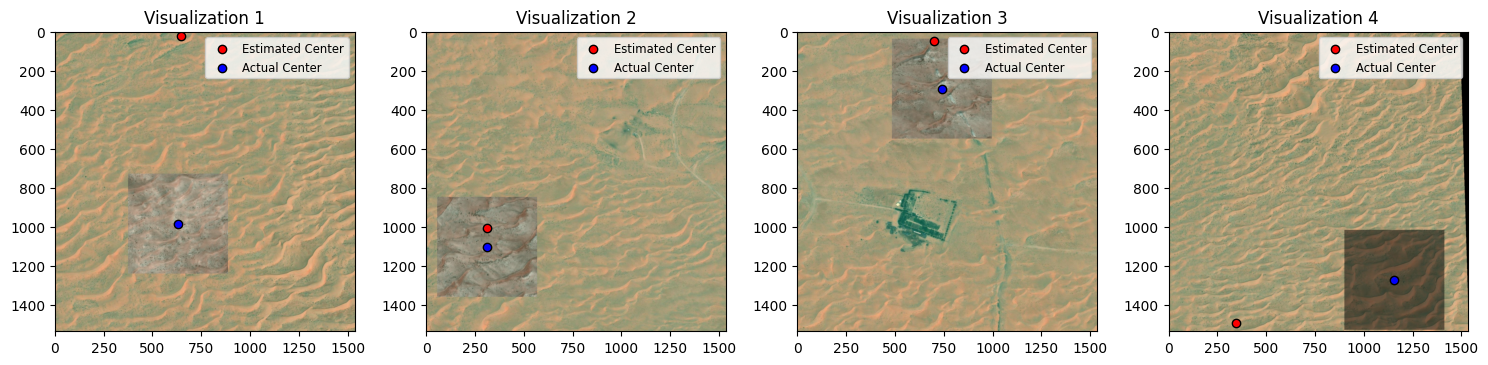

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Visualize Testset: 


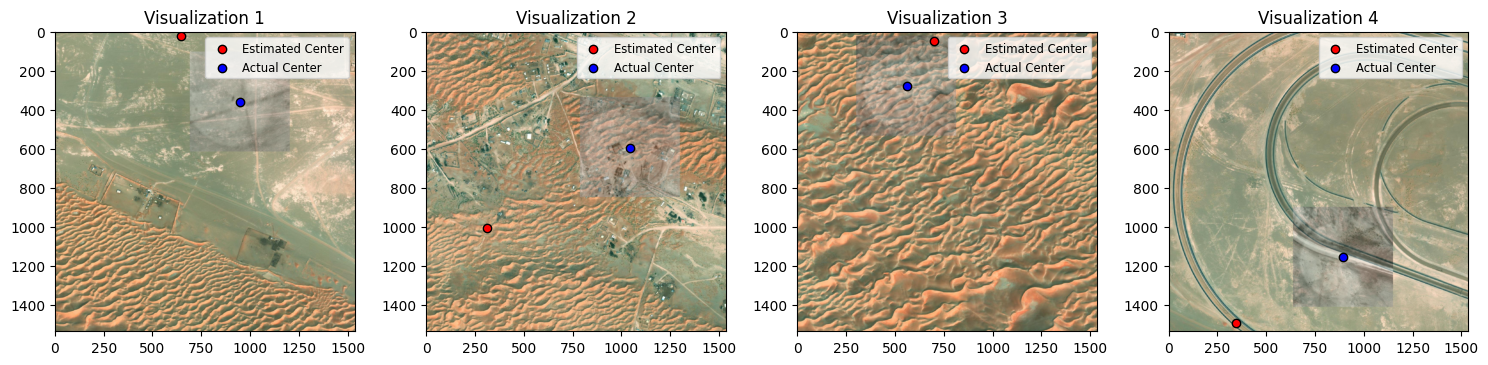

In [7]:
num_visualizations =4  # Change this value as needed. Bigger than num_samples will cause "visualize function" to malfunction.
print("Visualize Trainset: ")
visualize(trainset[-num_visualizations:],
          estimated_centers=trainset_estimated_centers[-num_visualizations:])

print(f"{'-'*220}","\n")

print("Visualize Testset: ")
visualize(testset[-num_visualizations:],
          estimated_centers=testset_estimated_centers[-num_visualizations:])